<a href="https://colab.research.google.com/github/Vamshi-Nallaguntla/Q-table/blob/main/Q_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the Gymnasium library
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 15.3 MB/s eta 0:00:00


In [ ]:
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import gymnasium as gym

In [ ]:
# Q-Learning Hyperparameters
learning_rate = 0.001
gamma = 0.99  # Discount factor
episodes = 1000
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01
bins = 20  # Discretization bins for state space

In [ ]:
# Initialize the CartPole environment
env = gym.make("CartPole-v1")

**Note:** \
Cart Position(x): [-4.8, 4.8]\
Cart Velocity(x dot): Unbounded(-inf, inf)\
Pole Angle(theta): [-0.42, 0.42] radians \
Pole Angular Velocity(theta dot): Unbounded (-inf, inf) \
 \

Since -infinity to +infinity is a very high range. I am assuming these conditions: \
Cart Velocity: Clipped to [-5, 5] \
Pole Angular Velocity: Clipped to [-50, 50]
 \
 I will be splitting them into 20 bins which I defined above in the Q-learning Hyperparameters block of code


In [ ]:
# Discretize the state space
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-5, 5]  # Clip velocity
state_bounds[3] = [-50, 50]  # Clip angular velocity

state_space = [np.linspace(b[0], b[1], bins) for b in state_bounds]

In [ ]:
def discretize_state(state):
    """Discretize continuous state into discrete indices."""
    indices = []                    # Initialize an empty list to store discrete indices
    for i in range(len(state)):     # Iterate through each state variable
        indices.append(np.digitize(state[i], state_space[i]) - 1) # Find the bin index and convert to zero-based
    return tuple(indices)           # Return the discrete indices as a tuple

In [ ]:
# Initialize Q-table
q_table = np.random.uniform(low=-1, high=1, size=([bins] * len(state_bounds) + [env.action_space.n]))

# Track rewards and Q-table snapshots
rewards = []
q_table_snapshots = {"first_5": [], "last_5": []}

# Training loop
for episode in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    total_reward = 0
    done = False

    while not done:
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Step through environment
        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        total_reward += reward

        # Q-value update using Bellman equation
        max_next_q = np.max(q_table[next_state])
        q_table[state][action] += learning_rate * (reward + gamma * max_next_q - q_table[state][action])
        state = next_state

    # Update epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

    # Capture Q-table for first 5 and last 5 episodes
    if episode < 5:
        q_table_snapshots["first_5"].append(q_table.copy())
    elif episode >= episodes - 5:
        q_table_snapshots["last_5"].append(q_table.copy())

env.close()

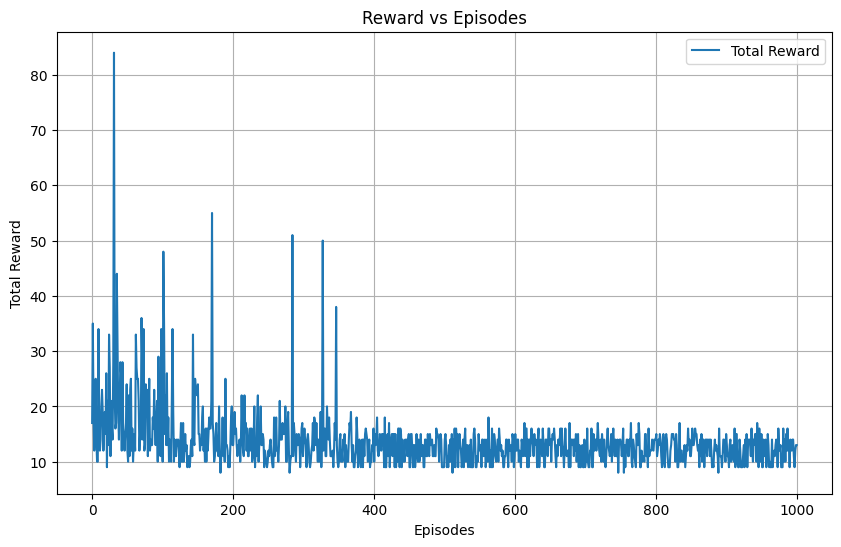

In [ ]:
# Reward Graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(rewards)), rewards, label="Total Reward")
plt.title("Reward vs Episodes") # Set title
plt.xlabel("Episodes")       # Set x-label
plt.ylabel("Total Reward")   # Set y-label
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Display Q-table snapshots
print("First 5 Episodes Q-tables:")
for i, q in enumerate(q_table_snapshots["first_5"]):
    print(f"Episode {i + 1} Q-table:\n", q)

print("\nLast 5 Episodes Q-tables:")
for i, q in enumerate(q_table_snapshots["last_5"]):
    print(f"Episode {episodes - 5 + i + 1} Q-table:\n", q)

Streaming output truncated to the last 5000 lines.
    [ 4.78956719e-01  5.25825356e-01]
    [-9.46544077e-01  8.05975308e-01]
    ...
    [ 7.31034115e-01  4.69130211e-01]
    [ 2.79184182e-01 -9.73912980e-01]
    [-6.88492301e-01 -8.51215153e-02]]

   ...

   [[ 9.13338861e-01  9.90063343e-01]
    [ 8.22337393e-02 -6.35943141e-01]
    [-6.34374487e-01  4.87065908e-01]
    ...
    [ 4.53319313e-01  7.68665116e-01]
    [-1.79400449e-01  2.29663974e-01]
    [-9.43578895e-01 -9.53755795e-01]]

   [[-4.69290217e-01 -1.74935715e-01]
    [-6.12853079e-01 -4.26840519e-01]
    [-7.14730238e-01  5.51764860e-01]
    ...
    [-6.69026027e-02 -7.57613545e-02]
    [ 1.46162983e-01  3.88840922e-01]
    [-8.85066274e-01  8.17881994e-01]]

   [[-5.47705905e-01 -1.02161880e-01]
    [ 6.48597868e-01 -5.33729616e-02]
    [ 2.63735533e-01 -9.21728569e-02]
    ...
    [ 2.71718912e-01 -4.05152470e-01]
    [-4.98597122e-01 -6.97497263e-01]
    [-5.91176801e-01  4.86790519e-01]]]]



 [[[[ 2.63118652e-01  6

In [ ]:
import numpy as np

# Function to save a Q-table to CSV
def save_q_table_to_csv(q_table, filename):
    # Reshape the multidimensional Q-table into a 2D array
    # Each row represents a state, and columns represent actions
    q_table_reshaped = q_table.reshape(-1, q_table.shape[-1])
    # Save to CSV
    np.savetxt(filename, q_table_reshaped, delimiter=",")
    print(f"Q-table saved to {filename}")

# Save the first 5 episode's Q-tables
for i, q_table in enumerate(q_table_snapshots["first_5"]):
    filename = f"q_table_episode_{i+1}.csv"
    save_q_table_to_csv(q_table, filename)

# Save the last 5 episode's Q-tables
for i, q_table in enumerate(q_table_snapshots["last_5"]):
    episode_number = episodes - 5 + i + 1
    filename = f"q_table_episode_{episode_number}.csv"
    save_q_table_to_csv(q_table, filename)


Q-table saved to q_table_episode_1.csv
Q-table saved to q_table_episode_2.csv
Q-table saved to q_table_episode_3.csv
Q-table saved to q_table_episode_4.csv
Q-table saved to q_table_episode_5.csv
Q-table saved to q_table_episode_996.csv
Q-table saved to q_table_episode_997.csv
Q-table saved to q_table_episode_998.csv
Q-table saved to q_table_episode_999.csv
Q-table saved to q_table_episode_1000.csv
